Problem Statement A key challenge for property sellers is to determine the sale price of the property. Some are apparent and obvious, and some are not Nevertheless, a rational approach aided by machine learning can be very useful in predicting the property price. A large data set with 79 different features (like living area, number of rooms, location, etc) along with their prices are provided for residential homes. The challenge is to learn a relationship between the important features and the price. Further, use it to predict the prices of a new set of houses.

In [2]:
#load the basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("houseprice.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

###Univariate Analysis

In [6]:
plt.rcParams['figure.figsize']=[10,6]

<function matplotlib.pyplot.show(close=None, block=None)>

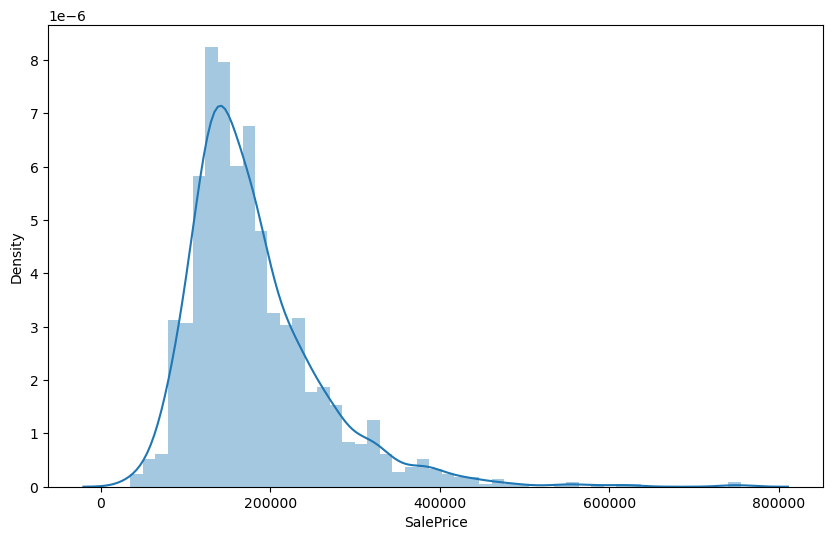

In [7]:
sns.distplot(df['SalePrice'])
plt.show

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df['SalePrice'].skew()

1.8828757597682129

In [10]:
df['SalePrice'].kurtosis()

6.536281860064529

In [11]:
df.drop('Id',axis=1,inplace=True)
df.shape

(1460, 80)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
cols=['MSSubClass','OverallQual','OverallCond']

In [14]:
for i in cols:
    df[cols]=df[cols].astype('object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [16]:
missing_value=df.isnull().sum()
missing_value

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [17]:
missing_values=(df.isnull().sum() / df.index.size) * 100

In [18]:
missing_values[missing_values>100]

Series([], dtype: float64)

In [19]:
(df.isnull().sum()/(df.index.size)* 100) [df.isnull().sum()/(df.index.size)*100 >0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [20]:
(df.isnull().sum()/(df.index.size)* 100) [df.isnull().sum()/(df.index.size)*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [21]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)


In [22]:
print('numerical data points are',df_num.shape)
print('categorical data points are',df_cat.shape)

numerical data points are (1460, 34)
categorical data points are (1460, 46)


In [23]:
df_num = df_num.drop('SalePrice',axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [24]:
cols= list(df_num.columns)
cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

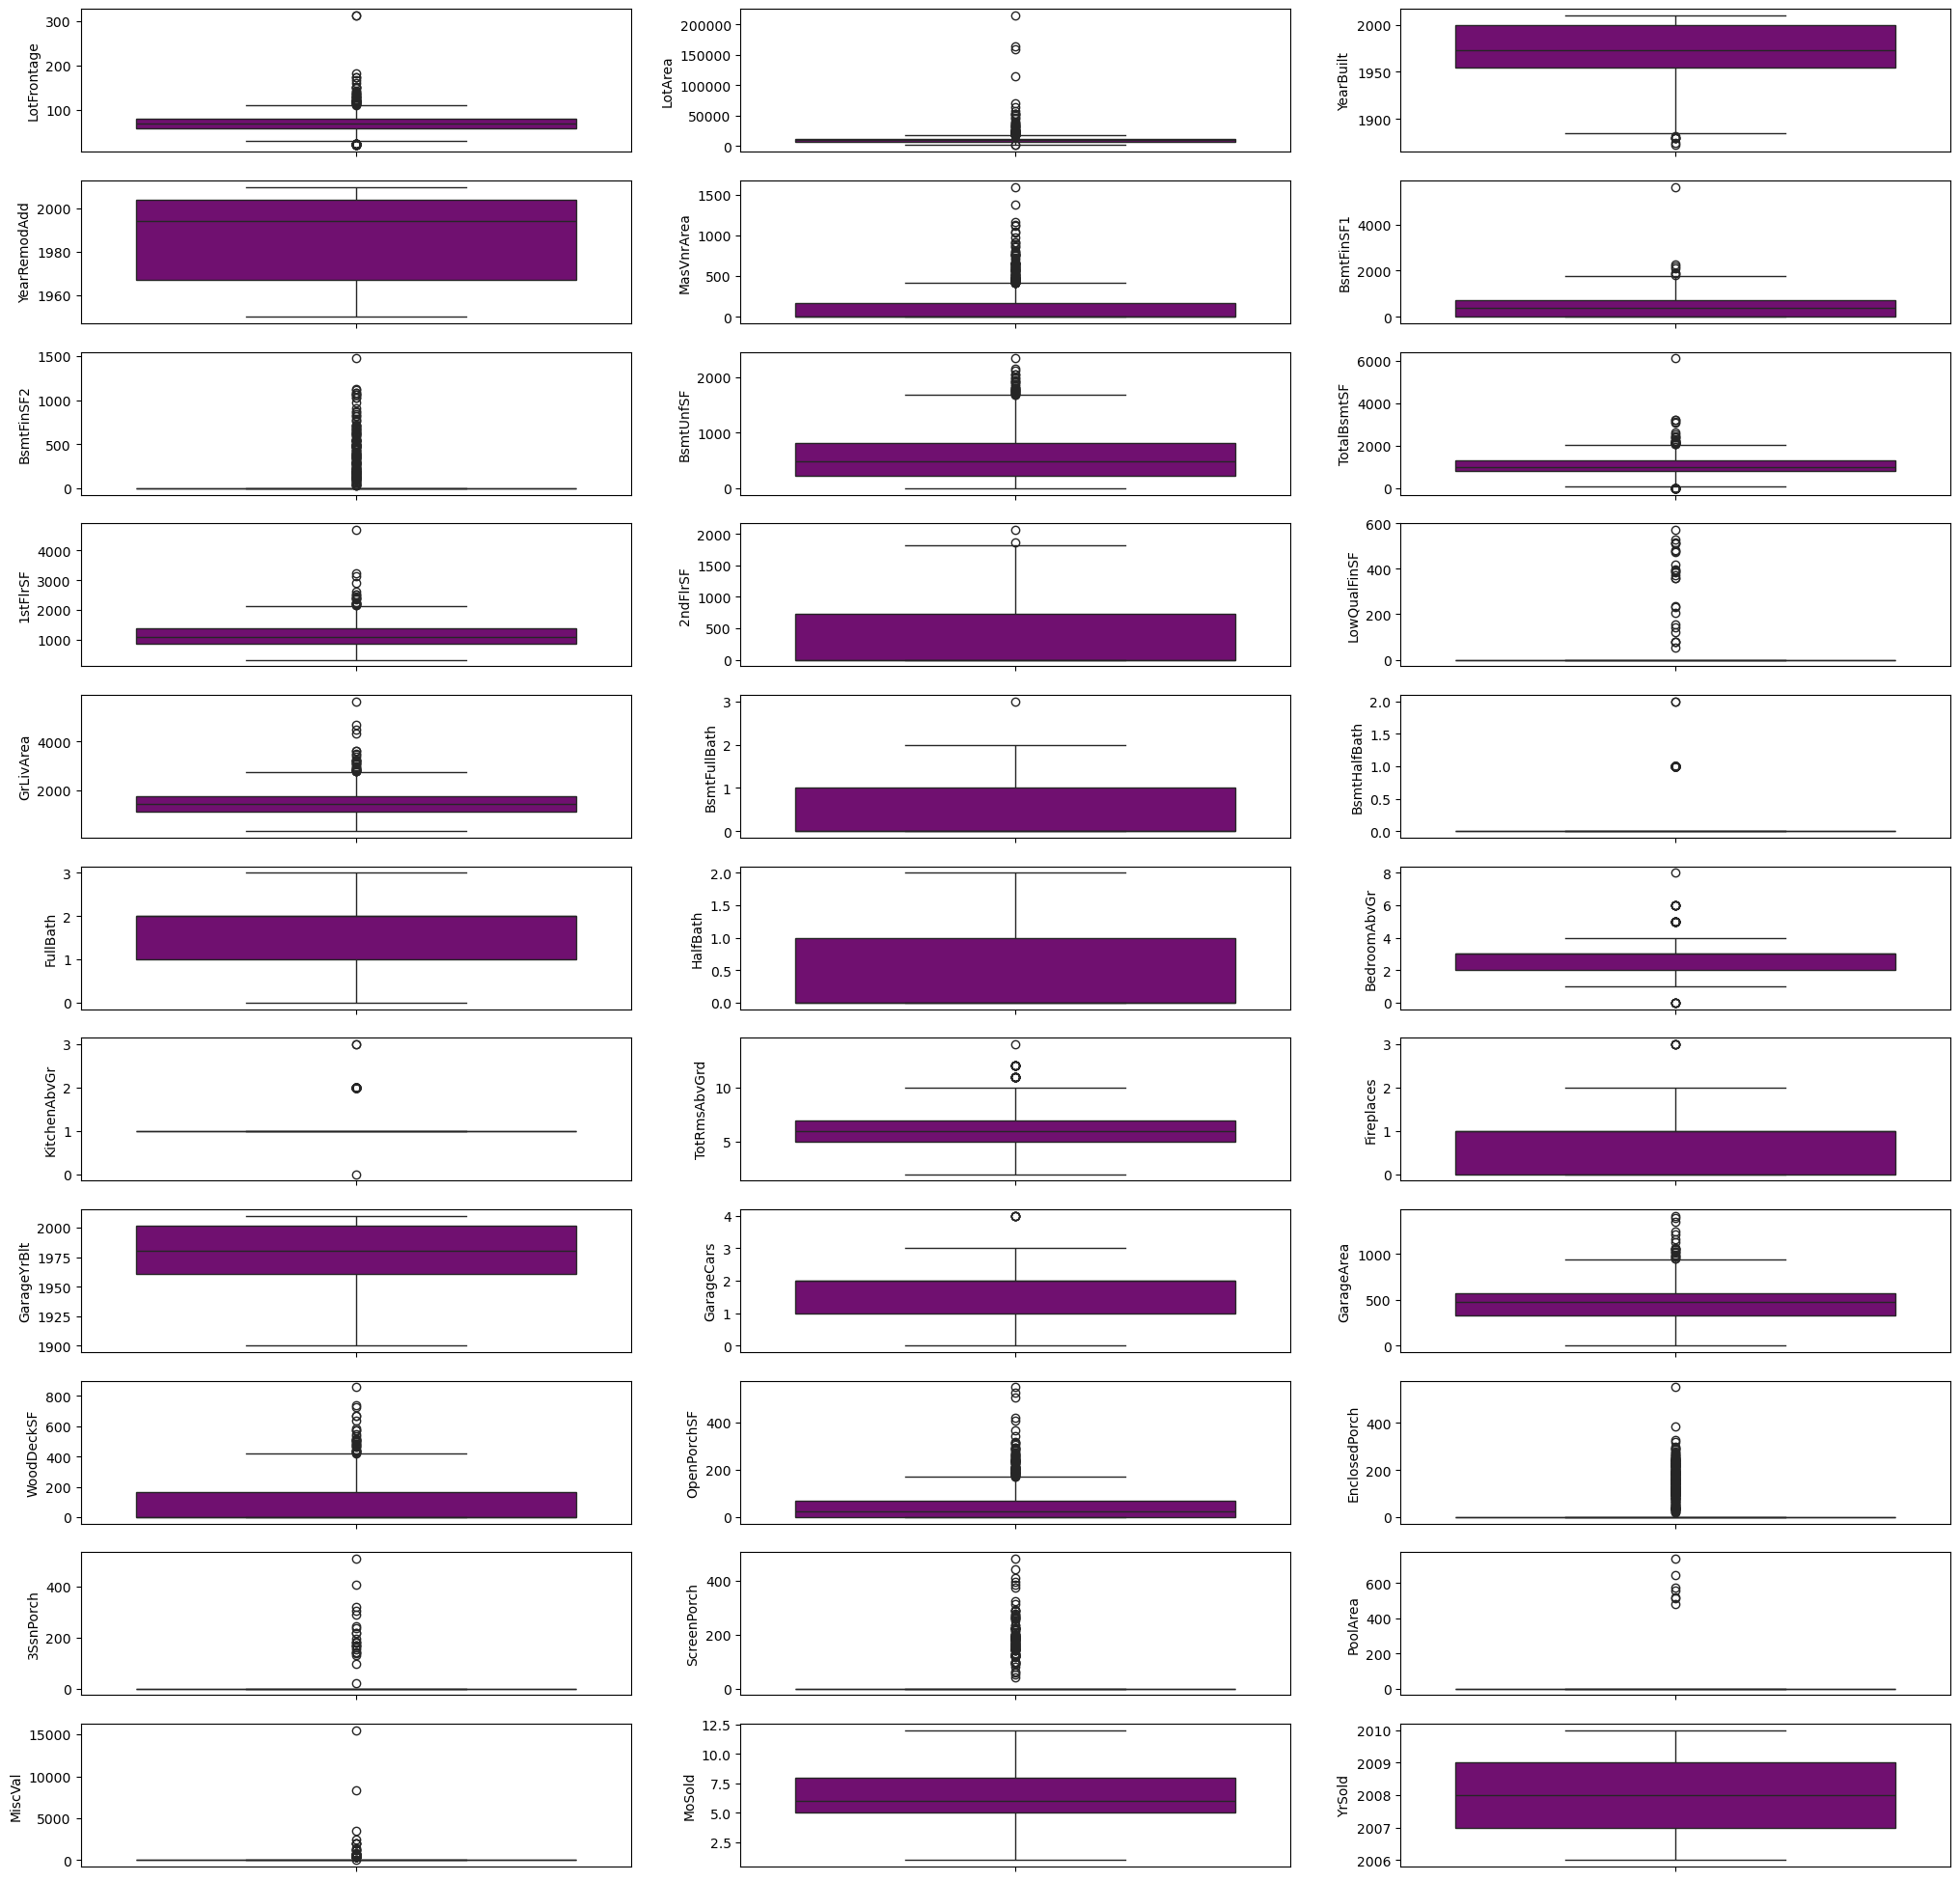

In [25]:
fig,ax = plt.subplots(11,3,figsize=(25,25))

for var,subplot in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[var],ax=subplot,color='purple')
    

plt.show()

In [26]:
(df_num.isnull().sum()/(df_num.index.size)* 100) [df_num.isnull().sum()/(df_num.index.size)*100 >0].sort_values(ascending=False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [27]:
# We will inpute the missing values for numerical columns
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5) # this is what we have initialized

df_num_sc = pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)
df_num_sc

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1456,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1457,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0
1458,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,...,240.0,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0


In [28]:
df_num_sc.isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [29]:
(df_cat.isnull().sum()/(df_cat.index.size)* 100) [df_cat.isnull().sum()/(df_cat.index.size)*100 >0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [30]:
df_cat['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [31]:
df_cat['PoolQC_ava'] = df_cat['PoolQC'].replace(np.nan,0).replace('Gd',1).replace('Ex',1).replace('Fa',1)

In [32]:
df_cat['PoolQC_ava'].value_counts()

0    1453
1       7
Name: PoolQC_ava, dtype: int64

In [33]:
df_cat['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [34]:
df_cat['MiscFeature_ava'] = df_cat['MiscFeature'].replace(np.nan,0).replace('Shed',1).replace('Gar2',1).replace('Othr',1).replace('TenC',1)

In [35]:
df_cat['MiscFeature_ava'].value_counts()

0    1406
1      54
Name: MiscFeature_ava, dtype: int64

In [36]:
df_cat['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [37]:
df_cat['Alley_ava'] = df_cat['Alley'].replace(np.nan,0).replace('Grvl',1).replace('Pave',1)

In [38]:
df_cat['Alley_ava'].value_counts()

0    1369
1      91
Name: Alley_ava, dtype: int64

In [39]:
df_cat['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [40]:
df_cat['Fence_ava'] = df_cat['Fence'].replace(np.nan,0).replace('MnPrv',1).replace('GdPrv',1).replace('GdWo',1).replace('MnWw',1)

In [41]:
df_cat['Fence_ava'].value_counts()

0    1179
1     281
Name: Fence_ava, dtype: int64

In [42]:
df_cat['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [43]:
df_cat['FireplaceQu_ava'] = df_cat['FireplaceQu'].replace(np.nan,0).replace('Gd',1).replace('TA',1).replace('Fa',1).replace('Ex',1).replace('Po',1)

In [44]:
df_cat['FireplaceQu_ava'].value_counts()

1    770
0    690
Name: FireplaceQu_ava, dtype: int64

In [45]:
df_cat['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [46]:
df_cat['MasVnrType_ava'] = df_cat['MasVnrType'].replace(np.nan,0).replace('BrkFace',1).replace('GdPrv',1).replace('Stone',1).replace('BrkCmn',1)

In [47]:
df_cat['MasVnrType_ava'].value_counts()

None    864
1       588
0         8
Name: MasVnrType_ava, dtype: int64

In [48]:
df_cat['MasVnrType_ava'].replace('None',np.nan)
print(df_cat['MasVnrType_ava'])

0          1
1       None
2          1
3       None
4          1
        ... 
1455    None
1456       1
1457    None
1458    None
1459    None
Name: MasVnrType_ava, Length: 1460, dtype: object


In [49]:
# Replace 'None' with 0 in the 'MasVnrType_ava' column
df_cat['MasVnrType_ava']= df_cat['MasVnrType_ava'].replace('None', 0)


In [50]:
df_cat['MasVnrType_ava'].value_counts()

0    872
1    588
Name: MasVnrType_ava, dtype: int64

In [51]:
df_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Fence,MiscFeature,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,NaN,NaN,WD,Normal,0,0,0,0,0,1
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,NaN,NaN,WD,Normal,0,0,0,0,1,0
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,NaN,NaN,WD,Normal,0,0,0,0,1,1
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,NaN,NaN,WD,Abnorml,0,0,0,0,1,0
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,NaN,NaN,WD,Normal,0,0,0,0,1,1


In [52]:
(df_cat['MasVnrType'].isnull().sum()/(df_cat['MasVnrType'].index.size)* 100) [df_cat['MasVnrType'].isnull().sum()/(df_cat['MasVnrType'].index.size)*100 >0]

array([0.54794521])

In [53]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'PoolQC_ava', 'MiscFeature_ava', 'Alley_ava', 'Fence_ava',
       'FireplaceQu_ava', 'MasVnrType_ava'],
      dtype='object')

In [54]:
df_cat.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [55]:
(df_cat.isnull().sum()/(df_cat.index.size)* 100) [df_cat.isnull().sum()/(df_cat.index.size)*100 >0].sort_values(ascending=False)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

In [56]:
# impute the missing values with simple imputer function

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imputer.fit(df_cat.iloc[:,:])

SimpleImputer(strategy='most_frequent')

In [57]:
df_cat_trans = imputer.transform(df_cat)

In [58]:
df_cat_trans

array([[60, 'RL', 'Pave', ..., 0, 0, 1],
       [20, 'RL', 'Pave', ..., 0, 1, 0],
       [60, 'RL', 'Pave', ..., 0, 1, 1],
       ...,
       [70, 'RL', 'Pave', ..., 1, 1, 0],
       [20, 'RL', 'Pave', ..., 0, 0, 0],
       [20, 'RL', 'Pave', ..., 0, 0, 0]], dtype=object)

In [59]:
df_cat = pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [60]:
df_cat.isnull().sum()

MSSubClass         0
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
PoolQC_ava         0
MiscFeature_ava    0
Alley_ava          0
Fence_ava          0
FireplaceQu_ava    0
MasVnrType_ava     0
dtype: int64

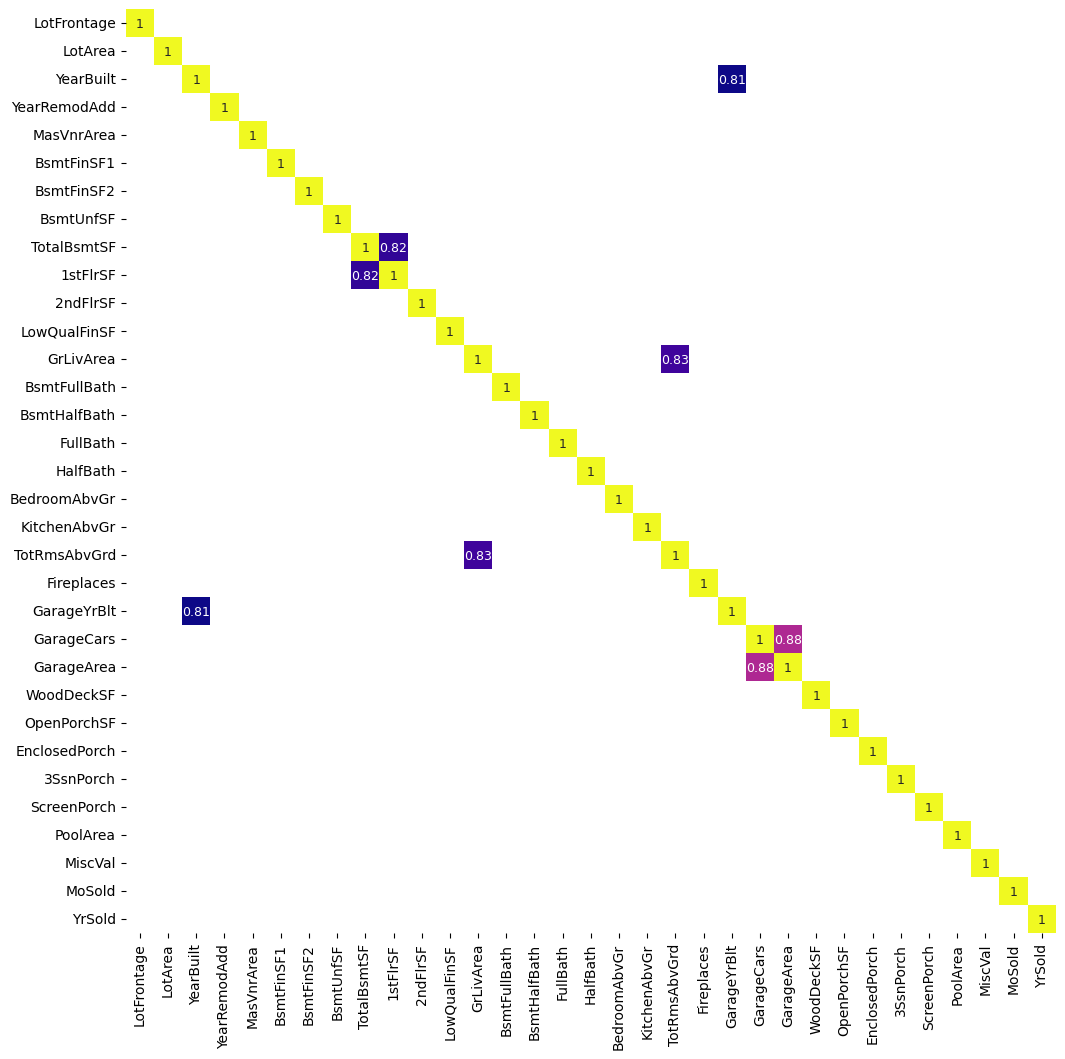

In [61]:
# correlation between the variables

plt.rcParams['figure.figsize']=[12,12]
sns.heatmap(df_num_sc.corr()[(df_num_sc.corr()>=0.75) | (df_num_sc.corr()<=-0.75)],
            cmap='plasma',
            annot=True,
            cbar=False,
            annot_kws={'size':9})

plt.show()

# auto eda

In [62]:
# pip install sweetviz

In [63]:
import sweetviz as sv
report1_num = sv.analyze(df_num_sc)
report1_num.show_html('report1_num.html')

                                             |                                             | [  0%]   00:00 ->…

Report report1_num.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



# Auto visualization

In [64]:
# pip install AutoViz

In [65]:
df_num_sc.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [66]:
df_num_red = df_num_sc[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath']]

In [67]:
df_num_red.to_csv('HousePrice_num_viz.csv')

In [68]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [69]:
AV.AutoViz('HousePrice_num_viz.csv')

Shape of your Data Set loaded: (1460, 16)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  15
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    16 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']
To fix these data quality issues in the dataset, imp

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,1459.000000,Possible ID column: drop before modeling step.
LotFrontage,float64,0.000000,NA,21.000000,313.000000,Column has 100 outliers greater than upper bound (113.62) or lower than lower bound(27.82). Cap them or remove them.
LotArea,float64,0.000000,NA,1300.000000,215245.000000,Column has 69 outliers greater than upper bound (17673.50) or lower than lower bound(1481.50). Cap them or remove them.
YearBuilt,float64,0.000000,NA,1872.000000,2010.000000,Column has 7 outliers greater than upper bound (2069.00) or lower than lower bound(1885.00). Cap them or remove them.
YearRemodAdd,float64,0.000000,NA,1950.000000,2010.000000,No issue
MasVnrArea,float64,0.000000,NA,0.000000,1600.000000,Column has 98 outliers greater than upper bound (415.00) or lower than lower bound(-249.00). Cap them or remove them.
BsmtFinSF1,float64,0.000000,NA,0.000000,5644.000000,Column has 7 outliers greater than upper bound (1780.62) or lower than lower bound(-1068.38). Cap them or remove them.
BsmtFinSF2,float64,0.000000,NA,0.000000,1474.000000,Column has 167 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
BsmtUnfSF,float64,0.000000,NA,0.000000,2336.000000,Column has 29 outliers greater than upper bound (1685.50) or lower than lower bound(-654.50). Cap them or remove them.
TotalBsmtSF,float64,0.000000,NA,0.000000,6110.000000,Column has 61 outliers greater than upper bound (2052.00) or lower than lower bound(42.00). Cap them or remove them.


Number of All Scatter Plots = 120
Could not draw Distribution Plot
All Plots done
Time to run AutoViz = 6 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Unnamed: 0,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
0,0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0
1,1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0
2,2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0
3,3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0
4,4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,62.0,7917.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0
1456,1456,85.0,13175.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0
1457,1457,66.0,9042.0,1941.0,2006.0,0.0,275.0,0.0,877.0,1152.0,1188.0,1152.0,0.0,2340.0,0.0,0.0
1458,1458,68.0,9717.0,1950.0,1996.0,0.0,49.0,1029.0,0.0,1078.0,1078.0,0.0,0.0,1078.0,1.0,0.0


# Encoding techniques

In [70]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [71]:
import category_encoders as ce
import pandas as pd


sample_dt = pd.DataFrame({
                      'Salary': ["Low", "Moderate", "Moderate", "High", "Low",
                                 "Moderate", "Moderate", "Moderate", "Low", "Low",
                                 "Low", "High", "Low", "Moderate", "Moderate"

                                 ],

                       'CIBIL':  [250, 650, 680, 800, 275,
                                 680, 675, 680, 200, 275,
                                 300, 820, 300, 690, 720
                                 ],

                      'Premium': [6250, 2231, 23456, 15000, 5600,
                                   5600, 7000, 4560, 8900, 9000,
                                   7688, 5600, 4580, 8900, 7800
                                 ],
                          })

In [72]:
sample_dt

,Salary,CIBIL,Premium
0,Low,250,6250
1,Moderate,650,2231
2,Moderate,680,23456
3,High,800,15000
4,Low,275,5600
5,Moderate,680,5600
6,Moderate,675,7000
7,Moderate,680,4560
8,Low,200,8900
9,Low,275,9000


In [73]:
x_sample = sample_dt.drop('Premium',axis=1)
y_sample = sample_dt['Premium']

In [74]:
sample_encode = ce.cat_boost.CatBoostEncoder()
sample_encode.fit(x_sample, y_sample)

sample_output = sample_encode.transform(x_sample)
sample_output


,Salary,CIBIL
0,7166.047619,250
1,8461.416667,650
2,8461.416667,680
3,9581.444444,800
4,7166.047619,275
5,8461.416667,680
6,8461.416667,675
7,8461.416667,680
8,7166.047619,200
9,7166.047619,275


In [75]:
df_target = np.log(df['SalePrice'])

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
def cat_boost(cat_input,target):
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encode = round(catboost.transform(cat_input),2)
    return df_encode

In [78]:
df_cat_en = cat_boost(df_cat,df_target)
df_cat_en.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,11.94,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,12.03,12.05,11.99,11.97,11.91,11.98,12.02,11.86,11.86,11.84,12.04,11.87,12.18,12.03,12.36,11.95,12.03,12.03,12.21,12.06,12.06,11.81,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.90
2,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,12.09,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,11.84,11.90,11.84,12.04,11.72,11.80,12.22,11.94,11.95,12.03,12.03,11.91,12.06,12.06,12.22,12.04,11.77,11.78,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.90
4,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,12.03,12.05,12.18,12.49,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,12.16,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [79]:
df_priceDataset = pd.concat([df_num_sc,df_cat_en],axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,11.94,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,12.03,12.05,11.99,11.97,11.91,11.98,12.02,11.86,11.86,11.84,12.04,11.87,12.18,12.03,12.36,11.95,12.03,12.03,12.21,12.06,12.06,11.81,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.90
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,12.09,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,11.84,11.90,11.84,12.04,11.72,11.80,12.22,11.94,11.95,12.03,12.03,11.91,12.06,12.06,12.22,12.04,11.77,11.78,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.90
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,12.03,12.05,12.18,12.49,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,12.16,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [80]:
df_priceDataset.shape

(1460, 79)

In [81]:
#Build the basic model
X = df_priceDataset
y = df_target

In [82]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,
                                            y,
                                            test_size=0.30,
                                            random_state = 0)

In [83]:
print('X Training',Xtrain.shape)
print('X Test',Xtest.shape)
print('y Training',ytrain.shape)
print('y Test',ytest.shape)

X Training (1022, 79)
X Test (438, 79)
y Training (1022,)
y Test (438,)


In [84]:
# Basic model - Linear Regression - SKLearn Method
lr = LinearRegression()
model_lr = lr.fit(Xtrain,ytrain)
pred_train = model_lr.predict(Xtrain)
pred_test = model_lr.predict(Xtest)

In [85]:
r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)

print('R2 Train Score',r2_train)
print('R2 Test Score',r2_test)

R2 Train Score 0.9145563098428308
R2 Test Score 0.8430978175117745


In [86]:
#RMSE
print("RMSE train", np.sqrt(mean_squared_error(ytrain, pred_train))) 
print("RMSE test", np.sqrt(mean_squared_error(ytest, pred_test)))

RMSE train 0.11749191848153458
RMSE test 0.15570206897245836


In [87]:
#Lets build the stats model for Linear regression

import statsmodels.api as sma

temp_x= sma.add_constant(X)

Xtrain, Xtest,ytrain,ytest,train_test_split(X,
                                            y,
                                            test_size=0.30,
                                            random_state=0)

(      LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
 64       70.4       9375.0   1997.0       1998.0        573.0       739.0     
 682      35.4       2887.0   1996.0       1997.0          0.0      1003.0     
 960      50.0       7207.0   1958.0       2008.0          0.0       696.0     
 1384     60.0       9060.0   1939.0       1950.0          0.0       204.0     
 1100     60.0       8400.0   1920.0       1950.0          0.0       290.0     
 ...           ...      ...        ...           ...         ...         ...   
 763      82.0       9430.0   1999.0       1999.0        673.0      1163.0     
 835      60.0       9600.0   1950.0       1995.0          0.0       442.0     
 1216     68.0       8930.0   1978.0       1978.0          0.0         0.0     
 559      43.0       3196.0   2003.0       2004.0         18.0         0.0     
 684      58.0      16770.0   1998.0       1998.0         30.0         0.0     
 
       BsmtFinSF2  BsmtUnfSF  TotalBsm

In [88]:
model = sma.OLS(ytrain,Xtrain).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     133.1
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:06:05   Log-Likelihood:                 738.34
No. Observations:                1022   AIC:                            -1323.
Df Residuals:                     945   BIC:                            -943.1
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
LotFrontage         0.0004      0.000      1.787      0.074   -4.15e-05       0.001
LotArea          1.384e-06   4.93e-07      2.808      0.005    4.17e-07    2.35e-06
YearBuilt          -0.0009      0.000     -2.264      0.024      -0.002      -0.000
YearRemodAdd        0.0016      0.000      5.274      0.000       0.001       0.002
MasVnrArea      -1.745e-05   3.28e-05     -0.533      0.594   -8.18e-05    4.69e-05
BsmtFinSF1       4.925e-05    1.2e-05      4.107      0.000    2.57e-05    7.28e-05
BsmtFinSF2       3.783e-05   2.12e-05      1.784      0.075   -3.78e-06    7.94e-05
BsmtUnfSF       -9.939e-06   1.12e-05     -0.888      0.375   -3.19e-05     1.2e-05
TotalBsmtSF      7.714e-05   1.53e-05      5.027      0.000     4.7e-05       0.000
1stFlrSF         5.271e-05   2.77e-05      1.900      0.058   -1.73e-06       0.000
2ndFlrSF         3.026e-05   2.61e-05      1.158      0.247    -2.1e-05    8.15e-05
LowQualFinSF     5.341e-05   6.78e-05      0.787      0.431   -7.97e-05       0.000
GrLivArea           0.0001   2.64e-05      5.160      0.000    8.45e-05       0.000
BsmtFullBath        0.0295      0.012      2.519      0.012       0.007       0.052
BsmtHalfBath        0.0153      0.018      0.827      0.408      -0.021       0.051
FullBath            0.0224      0.013      1.760      0.079      -0.003       0.047
HalfBath            0.0370      0.012      3.022      0.003       0.013       0.061
BedroomAbvGr        0.0182      0.008      2.308      0.021       0.003       0.034
KitchenAbvGr       -0.0479      0.026     -1.839      0.066      -0.099       0.003
TotRmsAbvGrd        0.0074      0.005      1.367      0.172      -0.003       0.018
Fireplaces          0.0349      0.016      2.247      0.025       0.004       0.065
GarageYrBlt        -0.0009      0.000     -2.557      0.011      -0.002      -0.000
GarageCars          0.0119      0.013      0.883      0.378      -0.015       0.038
GarageArea          0.0002   4.62e-05      3.361      0.001    6.47e-05       0.000
WoodDeckSF          0.0001   3.45e-05      2.987      0.003    3.53e-05       0.000
OpenPorchSF      1.522e-05   6.45e-05      0.236      0.814      -0.000       0.000
EnclosedPorch    2.267e-05   7.11e-05      0.319      0.750      -0.000       0.000
3SsnPorch           0.0002      0.000      1.349      0.178   -8.41e-05       0.000
ScreenPorch         0.0002   7.44e-05      3.157      0.002    8.89e-05       0.000
PoolArea            0.0024      0.001      2.978      0.003       0.001       0.004
MiscVal          1.522e-06    7.6e-06      0.200      0.841   -1.34e-05    1.64e-05
MoSold             -0.0016      0.001     -1.096      0.274      -0.005       0.001
YrSold             -0.0039      0.003     -1.255      0.210      -0.010       0.002
MSSubClass          0.0799      0.031      2.551      0.011

# clustering

In [89]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

df_num_standarized=pd.DataFrame(sc.fit_transform(df_num_sc), columns=df_num_sc.columns)
df_num_standarized.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.250384,-0.207142,1.050994,0.878668,0.506062,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.033810,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.381302,-0.091886,0.156734,-0.429577,-0.575300,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.065282,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,-0.124047,0.073480,0.984752,0.830215,0.318479,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.952396,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,-0.460946,-0.096897,-1.863632,-0.720298,-0.575300,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.830275,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.549751,0.375148,0.951632,0.733308,1.355703,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.911689,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


# Clustering Technique - KMeans

In [90]:
from sklearn.cluster import KMeans

cluster_range = range(1,11)

cluster_errors=[]

for num_clusters in cluster_range:
    clusters = KMeans (num_clusters, n_init=15, random_state=2)

    clusters.fit(df_num_standarized)

    labels =clusters.labels_

    centriods = clusters.cluster_centers_

    cluster_errors.append(clusters.inertia_)


clusters_df = pd.DataFrame({"num_clusters" : cluster_range, "cluster_errors":cluster_errors})

clusters_df[0:5]

,num_clusters,cluster_errors
0,1,48180.000000
1,2,41888.451350
2,3,39364.468962
3,4,37780.633277
4,5,36163.639003


# Elbow Plots

In [91]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

# silhouette Score

In [92]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [93]:
n_clusters = [2,3,4,5]

for k in n_clusters:
    cluster = KMeans(n_clusters=k, random_state=10) 
    predict = cluster.fit_predict(df_num_sc)

    score = silhouette_score(df_num_sc, predict, random_state=10)

    print("For {} clusters the silhouette score is {}".format(k, score))

For 2 clusters the silhouette score is 0.9630116148821823
For 3 clusters the silhouette score is 0.8511238295055927
For 4 clusters the silhouette score is 0.4391371474229554
For 5 clusters the silhouette score is 0.4292318910234882


# Visualization of the Silhouette Score

In [94]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [95]:
from yellowbrick.cluster import SilhouetteVisualizer

In [96]:
from sklearn.metrics import silhouette_score

In [97]:
for i in range(2,7):
    kms= KMeans(n_clusters=i) 
    kms.fit(df_num_standarized)
    model =KMeans(n_clusters=i, random_state=42)

    visualizer = SilhouetteVisualizer(model, colrs='yellowbrick')
    visualizer.fit(df_num_standarized)
    visualizer.show()

In [98]:
#Let take the optimal number of cluster

kmeans =KMeans (n_clusters=3,n_init=15, random_state=2)
kmeans.fit(df_num_standarized)



KMeans(n_clusters=3, n_init=15, random_state=2)

In [99]:
#labels
df_labels= pd.DataFrame(kmeans.labels_,columns= list(['labels']))
df_labels['labels'].astype('category')

0       0
1       1
2       0
3       2
4       0
       ..
1455    0
1456    1
1457    0
1458    2
1459    2
Name: labels, Length: 1460, dtype: category
Categories (3, int64): [0, 1, 2]

In [100]:
df_new_clusters= df.join(df_labels)

df_new_clusters.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,labels
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


# profiling of clusters

In [101]:
df_new_clusters[df_new_clusters.labels==0].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,labels
count,312.000000,400.000000,400.000000,400.000000,397.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,394.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.0
mean,74.570513,11070.092500,1984.622500,1994.087500,152.979849,361.145000,26.517500,569.305000,956.967500,1076.275000,921.51000,9.83250,2007.617500,0.327500,0.045000,2.0175,0.877500,3.407500,1.062500,7.915000,0.822500,1989.763959,2.135000,555.860000,116.815000,71.585000,13.805000,2.537500,17.722500,5.810000,44.200000,6.480000,2007.765000,224476.36750,0.0
std,24.293916,5587.060103,28.500275,14.246482,234.077298,386.692483,128.700658,380.209765,321.998796,310.392773,247.01487,64.72765,482.282591,0.475193,0.207564,0.3500,0.390994,0.709014,0.252494,1.590314,0.597399,19.992559,0.526753,172.273666,134.348724,71.566068,57.721716,22.884555,65.010009,58.611151,451.962981,2.638561,1.326338,82515.28054,0.0
min,24.000000,1950.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,495.000000,0.00000,0.00000,1200.000000,0.000000,0.000000,1.0000,0.000000,2.000000,1.000000,4.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,90000.00000,0.0
25%,62.750000,8713.500000,1976.000000,1991.750000,0.000000,0.000000,0.000000,254.750000,773.750000,847.000000,754.00000,0.00000,1670.250000,0.000000,0.000000,2.0000,1.000000,3.000000,1.000000,7.000000,0.000000,1979.250000,2.000000,440.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,174000.00000,0.0
50%,75.000000,10400.000000,1997.000000,1999.000000,0.000000,305.000000,0.000000,538.000000,912.000000,1024.000000,871.00000,0.00000,1931.000000,0.000000,0.000000,2.0000,1.000000,3.000000,1.000000,8.000000,1.000000,1998.000000,2.000000,527.500000,100.000000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,200750.00000,0.0
75%,85.000000,12378.000000,2003.000000,2004.000000,270.000000,644.250000,0.000000,846.000000,1117.000000,1234.500000,1067.75000,0.00000,2264.000000,1.000000,0.000000,2.0000,1.000000,4.000000,1.000000,9.000000,1.000000,2003.000000,2.000000,656.000000,192.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,252758.50000,0.0
max,174.000000,53504.000000,2009.000000,2010.000000,1600.000000,2096.000000,1474.000000,1926.000000,2444.000000,2444.000000,2065.00000,572.00000,4476.000000,2.000000,1.000000,3.0000,2.000000,8.000000,3.000000,14.000000,3.000000,2009.000000,4.000000,1069.000000,728.000000,547.000000,552.000000,245.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,755000.00000,0.0


In [102]:
df_new_clusters[df_new_clusters.labels==1].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,labels
count,313.000000,378.000000,378.000000,378.000000,373.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0
mean,77.226837,13264.201058,1992.579365,1996.878307,161.579088,689.933862,48.288360,802.814815,1541.037037,1595.391534,27.005291,0.0,1622.396825,0.624339,0.055556,1.854497,0.164021,2.661376,1.037037,6.603175,0.849206,1993.687831,2.264550,611.510582,131.410053,63.624339,8.164021,7.589947,17.507937,1.269841,9.523810,6.460317,2007.846561,231855.156085,1.0
std,30.240007,17563.462706,17.406066,13.843038,193.279750,617.167525,178.688069,569.107843,405.852155,346.889613,142.633566,0.0,408.878593,0.536854,0.240652,0.402240,0.377872,0.761570,0.189103,1.221466,0.644102,16.478840,0.481887,171.265693,130.570564,67.897189,39.383641,46.445183,57.545380,24.688536,113.606355,2.897866,1.328229,76149.297171,0.0
min,30.000000,2887.000000,1923.000000,1951.000000,0.000000,0.000000,0.000000,0.000000,520.000000,1034.000000,0.000000,0.0,1034.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1923.000000,1.000000,303.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,82500.000000,1.0
25%,62.000000,8652.000000,1977.250000,1992.250000,0.000000,16.000000,0.000000,340.000000,1316.000000,1374.250000,0.000000,0.0,1391.250000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,6.000000,0.000000,1981.000000,2.000000,484.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,179900.000000,1.0
50%,75.000000,10630.000000,2002.000000,2003.000000,106.000000,704.500000,0.000000,603.000000,1494.000000,1564.500000,0.000000,0.0,1571.500000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2002.000000,2.000000,569.500000,132.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,211450.000000,1.0
75%,89.000000,13119.000000,2006.000000,2006.000000,247.000000,1170.250000,0.000000,1345.000000,1686.000000,1718.750000,0.000000,0.0,1728.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,2006.000000,3.000000,710.250000,196.000000,83.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,265565.250000,1.0
max,313.000000,215245.000000,2010.000000,2010.000000,1115.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,1538.000000,0.0,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,2.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,418.000000,291.000000,508.000000,396.000000,480.000000,2000.000000,12.000000,2010.000000,611657.000000,1.0


In [103]:
df_new_clusters[df_new_clusters.labels==2].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,labels
count,576.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,607.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.0
mean,63.701389,8669.595308,1951.623167,1972.799120,43.326979,355.514663,57.334311,435.461877,848.310850,973.412023,187.385630,6.744868,1167.542522,0.372434,0.065982,1.139296,0.214076,2.662757,1.042522,5.651026,0.359238,1961.744646,1.275660,347.589443,60.407625,22.639296,34.376833,1.604106,12.143695,1.794721,61.897361,6.152493,2007.828446,127145.381232,2.0
std,18.326727,4073.662592,23.820059,20.305431,103.371776,319.002194,167.391352,325.740669,284.366297,230.072450,291.589596,50.806558,304.820915,0.504607,0.254276,0.375002,0.417574,0.757182,0.215980,1.203851,0.574784,21.223058,0.668327,184.056626,106.917473,52.436540,69.952072,18.082902,48.323584,33.174731,632.082056,2.622656,1.330170,29519.089128,0.0
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,2.0
25%,54.000000,6864.000000,1934.250000,1952.000000,0.000000,0.000000,0.000000,164.000000,714.250000,833.000000,0.000000,0.000000,936.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1950.000000,1.000000,254.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,109925.000000,2.0
50%,60.000000,8500.000000,1955.500000,1969.000000,0.000000,338.000000,0.000000,402.500000,864.000000,956.500000,0.000000,0.000000,1116.500000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1962.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,129250.000000,2.0
75%,74.000000,10018.000000,1968.000000,1994.750000,0.000000,600.000000,0.000000,684.000000,1032.000000,1097.750000,463.500000,0.000000,1348.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1976.000000,2.000000,470.000000,105.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,144000.000000,2.0
max,153.000000,57200.000000,2007.000000,2010.000000,1047.000000,1440.000000,1120.000000,1768.000000,1768.000000,1811.000000,1215.000000,528.000000,2526.000000,3.000000,2.000000,3.000000,2.000000,6.000000,3.000000,10.000000,2.000000,2008.000000,4.000000,1248.000000,736.000000,523.000000,330.000000,320.000000,385.000000,648.000000,15500.000000,12.000000,2010.000000,250000.000000,2.0


# Principal Component Analysis


In [104]:
from sklearn.decomposition import PCA

pca_hp =PCA().fit(df_num_standarized)
pca_hp.explained_variance_

array([6.55140008e+00, 3.14986432e+00, 2.48600899e+00, 1.88432690e+00,
       1.30983403e+00, 1.15589517e+00, 1.12442318e+00, 1.11708805e+00,
       1.08067584e+00, 1.03637664e+00, 1.01637558e+00, 9.96032548e-01,
       9.51338274e-01, 9.05082971e-01, 8.93799250e-01, 8.52767424e-01,
       8.20315876e-01, 7.36918410e-01, 7.04323197e-01, 6.45078964e-01,
       6.18234253e-01, 5.83710687e-01, 4.87396614e-01, 4.23489391e-01,
       3.87056604e-01, 2.99233052e-01, 2.28382612e-01, 2.00239444e-01,
       1.51784285e-01, 1.30544068e-01, 9.46215296e-02, 1.29203585e-30,
       2.00466531e-32])

1.The explained variance is the amount of variance captured by the principal components

2. The first principal component is the one which captures the highest variance.

In [105]:
pca_hp.components_

array([[ 1.85909004e-01,  1.23787912e-01,  2.36999863e-01, ...,
        -8.79816874e-03,  2.13195754e-02, -1.35226796e-02],
       [ 3.88202169e-02, -1.05753683e-02, -2.28344719e-01, ...,
         2.82218496e-02,  3.01367848e-02, -3.80426302e-02],
       [ 2.81770580e-01,  2.89235231e-01, -3.13595880e-01, ...,
         4.10372593e-02, -1.67502844e-02,  5.97972135e-03],
       ...,
       [ 5.09080280e-02, -1.08506323e-02, -1.97477942e-01, ...,
         1.35496813e-02, -4.75549683e-03,  6.03440316e-03],
       [-1.75766150e-16,  1.67564159e-16,  5.48770323e-16, ...,
        -1.59881221e-16, -2.52130925e-16, -1.15151253e-16],
       [ 0.00000000e+00, -9.00185789e-17, -2.43026831e-17, ...,
        -4.53664035e-17,  1.42148168e-17,  8.83104704e-17]])

The components are the ceofficients of the PCA. They are also called as weights

In [106]:
pca_hp.n_components_

33

In [107]:
var= np.cumsum(np.round(pca_hp.explained_variance_ratio_, decimals=3)*100)

var

array([ 19.8,  29.3,  36.8,  42.5,  46.5,  50. ,  53.4,  56.8,  60.1,
        63.2,  66.3,  69.3,  72.2,  74.9,  77.6,  80.2,  82.7,  84.9,
        87. ,  89. ,  90.9,  92.7,  94.2,  95.5,  96.7,  97.6,  98.3,
        98.9,  99.4,  99.8, 100.1, 100.1, 100.1])

1. PCA is used for dimension reduction

2. As per the percentage rule, we will take the number of pcs which explains atleast 80% of variation.

3. There are 16 pcs which explains atleast 80% of the variation.

In [108]:
pca_hp_new =PCA(n_components=16)

data_reduced= pca_hp_new.fit_transform(df_num_standarized)

data_reduced.transpose()

array([[ 1.27685715,  0.18842626,  1.46190284, ...,  0.61127811,
        -2.65874945, -0.58903259],
       [ 0.13021144, -1.0134621 ,  0.05512962, ...,  3.21762693,
        -1.77830062, -1.37661068],
       [-1.47302248,  0.82601134, -1.32305855, ...,  0.92827693,
         2.13412451,  1.64121154],
       ...,
       [-0.42938392,  0.59174838, -0.00432147, ...,  1.83758194,
         0.78534731,  0.09568541],
       [ 0.51873147, -0.30252277,  0.09054818, ..., -1.95802186,
        -1.89508436, -0.72747412],
       [-0.92536859, -0.55205406,  0.05502488, ..., -0.6460054 ,
         1.15087563,  1.15505811]])

The components are the ceofficients of the prin

In [109]:
pca_df_hp = pd.DataFrame(data_reduced)
pca_df_hp.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.276857,0.130211,-1.473022,-2.325780,1.356259,-0.679361,-0.270335,0.052399,-0.359669,0.483373,-0.229900,-0.444494,0.770059,-0.429384,0.518731,-0.925369
1,0.188426,-1.013462,0.826011,0.162856,-1.113212,1.372540,2.886152,-0.377665,0.033816,-0.110639,-0.619039,-2.578871,0.059836,0.591748,-0.302523,-0.552054
2,1.461903,0.055130,-1.323059,-1.724985,0.084942,0.499082,-0.449423,0.008571,-0.114110,0.022016,0.113167,0.716024,0.150325,-0.004321,0.090548,0.055025
3,-0.599675,1.090388,0.956728,-0.084536,0.463167,-0.645969,-0.869876,0.984322,-2.807762,-1.203807,1.394637,0.423244,2.745303,1.432272,0.123195,-0.255390
4,4.160758,0.958770,-0.580692,-1.699212,0.126732,1.324581,-0.107008,-0.115841,-0.103889,-0.683004,0.132877,0.930696,-0.047729,0.451658,0.193642,0.465568


In [110]:
pca_df_hp.columns=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
pca_df_hp.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.276857,0.130211,-1.473022,-2.325780,1.356259,-0.679361,-0.270335,0.052399,-0.359669,0.483373,-0.229900,-0.444494,0.770059,-0.429384,0.518731,-0.925369
1,0.188426,-1.013462,0.826011,0.162856,-1.113212,1.372540,2.886152,-0.377665,0.033816,-0.110639,-0.619039,-2.578871,0.059836,0.591748,-0.302523,-0.552054
2,1.461903,0.055130,-1.323059,-1.724985,0.084942,0.499082,-0.449423,0.008571,-0.114110,0.022016,0.113167,0.716024,0.150325,-0.004321,0.090548,0.055025
3,-0.599675,1.090388,0.956728,-0.084536,0.463167,-0.645969,-0.869876,0.984322,-2.807762,-1.203807,1.394637,0.423244,2.745303,1.432272,0.123195,-0.255390
4,4.160758,0.958770,-0.580692,-1.699212,0.126732,1.324581,-0.107008,-0.115841,-0.103889,-0.683004,0.132877,0.930696,-0.047729,0.451658,0.193642,0.465568


# We have reduced the number of principal components from 33 to 16.

In [111]:


corr = pca_df_hp.corr()

corr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
PC0,1.000000e+00,-2.948184e-17,-1.357780e-16,6.622885e-17,6.123948e-17,-1.594837e-17,-2.730750e-17,-6.123541e-17,-3.792134e-17,2.651645e-17,2.252227e-18,-8.808138e-17,-3.450382e-17,3.518895e-17,-1.077032e-17,6.969984e-17
PC1,-2.948184e-17,1.000000e+00,4.071341e-16,4.410274e-17,-1.181579e-16,-9.172287e-17,-9.542368e-17,-2.506997e-17,-7.250704e-17,7.917871e-18,-1.265228e-16,-3.313351e-17,7.385010e-18,4.777172e-18,-1.814050e-19,-1.362245e-16
PC2,-1.357780e-16,4.071341e-16,1.000000e+00,2.930780e-16,-2.574430e-16,-1.242540e-16,-1.552915e-16,-1.374442e-16,4.271139e-18,2.245209e-16,2.434263e-17,-1.130848e-16,-1.761515e-17,8.109091e-17,-1.511038e-17,-2.529501e-17
PC3,6.622885e-17,4.410274e-17,2.930780e-16,1.000000e+00,-1.428863e-17,-1.076069e-16,-2.111997e-17,4.405674e-17,-1.051565e-16,2.356707e-16,2.277508e-16,-7.326303e-17,-2.637106e-17,-1.664581e-16,-1.205536e-16,3.361637e-17
PC4,6.123948e-17,-1.181579e-16,-2.574430e-16,-1.428863e-17,1.000000e+00,-1.948196e-16,-1.227707e-16,8.177988e-18,-3.536592e-16,3.660046e-16,-3.108836e-16,-3.554305e-16,-1.711013e-16,1.807435e-16,1.643561e-16,-1.377721e-16
PC5,-1.594837e-17,-9.172287e-17,-1.242540e-16,-1.076069e-16,-1.948196e-16,1.000000e+00,-3.797897e-17,-2.972605e-16,5.468885e-16,-2.742738e-16,-1.892466e-16,-7.837371e-17,-1.201680e-16,1.374519e-16,3.905307e-16,-1.147370e-16
PC6,-2.730750e-17,-9.542368e-17,-1.552915e-16,-2.111997e-17,-1.227707e-16,-3.797897e-17,1.000000e+00,6.881973e-16,1.121059e-16,1.979378e-16,2.519801e-17,3.427666e-16,3.413822e-17,2.217463e-16,-1.856636e-16,-3.170562e-17
PC7,-6.123541e-17,-2.506997e-17,-1.374442e-16,4.405674e-17,8.177988e-18,-2.972605e-16,6.881973e-16,1.000000e+00,2.749502e-16,-6.639355e-16,-2.285252e-17,-4.874121e-16,2.052054e-16,-3.156417e-16,5.151041e-16,-6.299536e-17
PC8,-3.792134e-17,-7.250704e-17,4.271139e-18,-1.051565e-16,-3.536592e-16,5.468885e-16,1.121059e-16,2.749502e-16,1.000000e+00,-2.912084e-16,-3.523995e-16,-8.337493e-17,-7.024508e-17,-2.009724e-16,-3.680837e-16,1.743877e-18
PC9,2.651645e-17,7.917871e-18,2.245209e-16,2.356707e-16,3.660046e-16,-2.742738e-16,1.979378e-16,-6.639355e-16,-2.912084e-16,1.000000e+00,5.505109e-16,-2.019202e-16,5.585187e-16,-3.958318e-16,3.206821e-16,-2.719705e-16


In [112]:
plt.figure(figsize=(15,8))

sns.heatmap(corr,annot=True,fmt='.2f',cmap='plasma',cbar='False')

plt.show()

Lets see if scaling of the data impacts the performance of the model Linear Regression



In [113]:
df_priceDataset = pd.concat([df_num_sc,df_cat], axis=1)
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,0,0,0,0,0,1
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,0,0,0,0,1,0
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,0,0,0,0,1,1
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,0,0,0,0,1,0
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,0,0,0,0,1,1


In [114]:
df_priceDataset.shape

(1460, 79)

In [115]:
from sklearn.preprocessing import StandardScaler

X= df_priceDataset

y= df_target


In [116]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size=0.30,
                                                random_state =0)

In [118]:
sc = StandardScaler()
Xtrain_sc = sc.fit_transform(Xtrain.iloc[:,0:33])
Xtest_sc = sc.fit_transform(Xtest.iloc[:,0:33])
Xtrain_en = cat_boost(Xtrain.iloc[:,33:79],ytrain)

Xtest_en = cat_boost(Xtest.iloc[:,33:79],ytest)

In [121]:
 Xtrain_sc = pd.DataFrame(sc.fit_transform(Xtrain.iloc[:,0:33]),columns=Xtrain.iloc[:,0:33].columns)

Xtest_sc = pd.DataFrame(sc.fit_transform(Xtest.iloc[:,0:33]),columns=Xtest.iloc[:,0:33].columns)

Xtrain_en = pd.DataFrame(cat_boost(Xtrain.iloc[:,33:79],ytrain),columns=Xtrain.iloc[:,33:79].columns)

Xtest_en = pd.DataFrame(cat_boost(Xtest.iloc[:,33:79],ytest),columns=Xtrain.iloc[:,33:79].columns)

In [122]:
Xtrain_sc.reset_index(inplace=True)

Xtest_sc.reset_index(inplace=True)

Xtrain_en.reset_index(inplace=True) 
Xtest_en.reset_index(inplace=True)

In [129]:
Xtrain = pd.concat([Xtrain_sc, Xtrain_en], axis=1) 
Xtest= pd.concat([Xtest_sc, Xtest_en], axis=1)
Xtest.head()

,index,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,index,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,0,2.792763,2.416210,-0.499452,-0.489253,-0.044464,1.508151,-0.267625,0.532397,1.950217,3.257804,-0.772604,-0.122844,1.870757,1.06005,-0.241529,2.558690,-0.746733,1.425405,4.348458,1.552447,2.083452,-0.144807,0.290793,0.011842,-0.787400,-0.715082,3.442828,-0.11767,-0.250813,-0.09539,-0.12063,-1.254194,-0.587367,529,12.07,12.08,12.03,12.17,12.02,12.03,12.24,12.02,12.14,12.06,12.03,12.05,12.01,11.98,11.76,12.15,12.03,11.89,12.03,12.31,12.04,12.27,11.79,12.03,11.92,11.88,12.03,12.04,11.8,12.06,12.06,11.80,12.18,12.12,12.16,12.04,12.04,12.06,12.0,11.89,12.02,12.03,12.04,12.07,12.22,11.91
1,1,0.284478,-0.098459,-1.031067,-1.681888,-0.583199,-0.085839,0.709304,-0.719297,-0.513861,-0.498799,0.683589,-0.122844,0.143949,1.06005,-0.241529,-0.943517,-0.746733,0.236210,-0.229967,-0.878194,2.083452,-1.566158,-0.995746,-1.073592,-0.787400,-0.715082,0.263158,-0.11767,-0.250813,-0.09539,-0.12063,0.605444,-1.359941,491,11.83,12.08,12.03,11.94,12.02,12.03,12.01,12.02,11.86,11.79,12.03,12.05,11.83,11.98,11.89,12.00,12.03,11.89,11.86,11.82,12.04,11.86,11.79,12.03,11.92,11.88,11.92,12.04,11.8,12.06,11.64,11.49,12.04,12.12,11.78,12.04,12.04,12.06,12.0,12.01,12.02,12.03,12.04,11.88,12.22,11.91
2,2,-0.390535,-0.366981,-0.732033,-1.681888,0.307318,-0.511684,-0.267625,-0.099947,-0.708341,-0.448132,-0.246495,-0.122844,-0.547143,1.06005,-0.241529,-0.943517,-0.746733,0.236210,-0.229967,-0.878194,0.580071,-1.189918,-0.995746,-0.575360,-0.787400,-0.715082,4.351306,-0.11767,-0.250813,-0.09539,-0.12063,0.233516,0.957779,459,11.83,12.08,12.03,12.17,11.81,12.03,12.01,12.02,11.71,12.06,12.03,12.05,11.83,11.78,11.53,12.00,12.03,11.87,11.88,11.82,12.04,11.86,11.79,12.03,11.92,11.87,12.03,12.04,11.8,12.06,12.06,12.20,12.04,11.75,11.78,12.04,12.04,12.06,12.0,12.01,12.02,12.03,12.04,12.07,12.22,12.20
3,3,0.437890,-0.042584,0.165068,-0.393842,1.070617,-0.107327,-0.267625,0.428450,0.195890,-0.021081,1.261369,-0.122844,0.962202,-0.83506,-0.241529,0.807587,1.200107,1.425405,-0.229967,0.944787,0.580071,-0.061199,0.290793,0.105261,1.655558,1.144791,-0.342494,-0.11767,-0.250813,-0.09539,-0.12063,-1.254194,0.185206,279,12.33,12.08,12.03,11.94,12.02,12.03,12.01,12.02,12.27,12.06,12.03,12.05,12.19,12.21,12.16,12.15,12.03,12.04,11.99,11.82,12.04,11.86,12.18,12.03,11.92,11.88,12.03,12.04,12.2,12.06,12.06,11.80,12.04,12.12,12.38,12.04,12.04,12.06,12.0,12.01,12.02,12.03,12.04,12.07,12.22,12.20
4,4,-1.939996,-0.945795,-0.034288,-0.680074,1.524172,-0.873067,-0.267625,-0.097781,-1.077251,-1.543506,0.559108,-0.122844,-0.751706,-0.83506,-0.241529,-0.943517,1.200107,0.236210,-0.229967,-0.270534,-0.923309,-0.312025,-0.995746,-0.966828,-0.787400,-0.715082,-0.342494,-0.11767,-0.250813,-0.09539,-0.12063,-1.254194,1.730353,655,11.86,11.71,12.03,11.94,12.02,12.03,12.01,12.02,11.68,12.06,12.03,11.73,12.19,11.98,12.16,12.00,12.03,11.96,12.31,11.82,12.04,11.86,11.79,12.03,11.92,11.96,12.03,12.04,11.8,12.06,12.06,11.80,12.04,11.75,11.78,12.04,12.04,12.06,12.0,11.85,12.02,12.03,12.04,12.07,11.82,12.20


In [128]:
lr=LinearRegression()
lr.fit(Xtrain, ytrain)
print("Training R2",lr.score(Xtrain, ytrain))
print("Testing R2",lr.score (Xtest,ytest))

# Training R2 0.9119883978798546  sir's output

# Testing R2 -1.5596461305165582e+22

Training R2 0.9129700253511194
Testing R2 0.8054232876376404


different model Decision Tree

In [141]:
from sklearn import tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV

rfr =RandomForestRegressor(random_state=123)

dtr = tree.DecisionTreeRegressor (random_state=123)

df_priceDataset = pd.concat([df_num_sc, df_cat_en], axis=1) 
df_priceDataset.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,PoolQC_ava,MiscFeature_ava,Alley_ava,Fence_ava,FireplaceQu_ava,MasVnrType_ava
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,12.34,12.09,12.03,11.94,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,11.94,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,11.81,12.21
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,12.05,12.09,12.03,11.94,12.02,12.02,12.03,12.02,12.32,11.82,12.03,12.05,11.99,11.97,11.91,11.98,12.02,11.86,11.86,11.84,12.04,11.87,12.18,12.03,12.36,11.95,12.03,12.03,12.21,12.06,12.06,11.81,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,11.90
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,12.34,12.09,12.03,12.16,12.02,12.02,12.00,12.02,12.16,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,12.09,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,11.97,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.20,12.04,12.03,12.05,12.18,12.22,12.14,11.98,12.02,11.84,11.90,11.84,12.04,11.72,11.80,12.22,11.94,11.95,12.03,12.03,11.91,12.06,12.06,12.22,12.04,11.77,11.78,12.03,12.04,12.06,11.99,11.79,12.02,12.03,12.04,12.06,12.22,11.90
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,12.34,12.09,12.03,12.16,12.02,12.02,12.03,12.02,12.66,12.04,12.03,12.05,12.18,12.49,12.14,11.98,12.02,12.21,12.21,12.31,12.04,12.26,12.18,12.03,12.16,12.30,12.03,12.03,12.21,12.06,12.06,12.22,12.04,12.10,12.17,12.03,12.04,12.06,11.99,12.01,12.02,12.03,12.04,12.06,12.22,12.21


In [142]:
X= df_priceDataset

y= df_target


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=123,
                                                    random_state =0)

In [144]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=123)

In [145]:
dtr.score(X_train,y_train)

1.0

In [146]:
dtr.score(X_test,y_test)

0.7052499559988358

#RMSE for Decision Tree

In [148]:
np.sqrt(mean_squared_error(y_train,dtr.predict(X_train)))



0.0

In [149]:
np.sqrt(mean_squared_error(y_test,dtr.predict(X_test)))

0.2085145553579405

#LETS Fine tune the performance of the model by using GridSearch CVν


In [154]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3,15,30],
    'min_samples_split': [15,30,35,40,50]
}

dtr = tree.DecisionTreeRegressor(random_state= 123)
grid_search= GridSearchCV(estimator = dtr,
                         param_grid= param_grid ,
                         cv=3)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)


{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 35}


In [158]:
dtr =tree.DecisionTreeRegressor(max_depth = 10,
                                min_samples_split=35,
                                min_samples_leaf= 3)

dtr.fit(X_train,y_train)

print("score for training", dtr.score(X_train,y_train)) 
print("score for testing", dtr.score(X_test,y_test))

print("RMSE for training data", np.sqrt(mean_squared_error(y_train,dtr.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,dtr.predict(X_test))))

score for training 0.881400987743775
score for testing 0.8032129209583805
RMSE for training data 0.13798611208270806
RASE for testing data 0.1703757288485604


#random forest model

In [159]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [160]:
print("score for training", rfr.score(X_train,y_train)) 
print("score for testing", rfr.score(X_test,y_test))

score for training 0.9827503261993642
score for testing 0.8893000289693935


In [161]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,rfr.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))

RMSE for training data 0.052624173189888476
RASE for testing data 0.12778597489723367


#find tune the perfomance of the model using Gridshearchcv

In [164]:
param_grid={
    'max_depth': [7,10],
    'max_features': [4,6],
    'min_samples_leaf': [3,15,30],
    'min_samples_split': [30,50,100],
    'n_estimators': [300,500]
}

rfr= RandomForestRegressor(random_state=123)

grid_search= GridSearchCV(estimator = rfr,
                         param_grid=param_grid,
                         cv=3) 
    

In [165]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [166]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


In [168]:
rfr = RandomForestRegressor(n_estimators=300,
                            max_depth =10,
                            max_features=6,
                            min_samples_leaf =3,
                            min_samples_split=30,
                            random_state=123)

In [169]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=3,
                      min_samples_split=30, n_estimators=300, random_state=123)

In [170]:
print("score for training", rfr.score(X_train,y_train)) 
print("score for testing", rfr.score(X_test,y_test))

score for training 0.8922009439982407
score for testing 0.8777460895837813


In [171]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,rfr.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,rfr.predict(X_test))))

RMSE for training data 0.13155347391162076
RASE for testing data 0.13428911653225922


# Stochastic Gradient Descent

In [173]:
from sklearn.linear_model import SGDRegressor

sgd =SGDRegressor()

sgd.fit(X_train,y_train)

SGDRegressor()

In [174]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,sgd.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,sgd.predict(X_test))))

RMSE for training data 8.523004930308714e+16
RASE for testing data 5.765969416145793e+16


In [175]:
sgd = SGDRegressor()
estimator = sgd
params = {'l1_ratio':[0.1,0.01,0.001,0.2,0.30,0.5,0.7,0.8],
          'penalty' :['l1','l2','elasticnet'],
          'loss': ['squared_error','huber'],
          'alpha': [0.1,0.2,0.3,0.9,1,2,3,4,5,6]

}

In [176]:
grid_sgd= GridSearchCV(estimator = sgd,
                         param_grid= params ,
                         cv=5)

grid_sgd.fit(X_train,y_train)

print(grid_sgd.best_params_)

{'alpha': 0.3, 'l1_ratio': 0.8, 'loss': 'huber', 'penalty': 'elasticnet'}


In [182]:
from sklearn.linear_model import SGDRegressor

sgd= SGDRegressor(alpha=0.3,
                  l1_ratio=0.8,
                  loss='huber',
                  penalty= 'elasticnet'
                 )

sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.3, l1_ratio=0.8, loss='huber', penalty='elasticnet')

In [183]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,sgd.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,sgd.predict(X_test))))

RMSE for training data 12.032039067112024
RASE for testing data 12.021232149233168


# Gradient boosting Algorithm

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

gbm= GradientBoostingRegressor()

gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [186]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,gbm.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,gbm.predict(X_test))))

RMSE for training data 0.08093827284647372
RASE for testing data 0.12546127066151924


# Xtreme Gradient boosting

In [187]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [188]:
from xgboost import XGBRegressor

In [189]:
xgb =XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [190]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

RMSE for training data 0.009901049987283604
RASE for testing data 0.15636355670514981


GridSearch CV 

In [192]:
params = { 'n_estimators': [100,200],
          'learning_rate' : [0.1],
          'colsample_bytree':[0.5,0.8],
          'max_depth' : [2,4,6]

}

In [194]:
grid_xgb = GridSearchCV(estimator =xgb,
                        param_grid =params,
                        cv=3)
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [195]:
xgb =XGBRegressor(n_estimators =200,
                  learning_rate=0.1,
                  colsample_bytree=0.5,
                  max_depth=4
)

In [196]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [197]:
print("RMSE for training data", np.sqrt(mean_squared_error(y_train,xgb.predict(X_train))))
print("RASE for testing data", np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))

RMSE for training data 0.050706169316332095
RASE for testing data 0.12486291319735843
